In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import os
import sys
import glob
import cv2

import pandas as pd
import numpy as np
from natsort import natsorted

import matplotlib
matplotlib.use('TkAgg')
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize

%matplotlib notebook

<IPython.core.display.Javascript object>


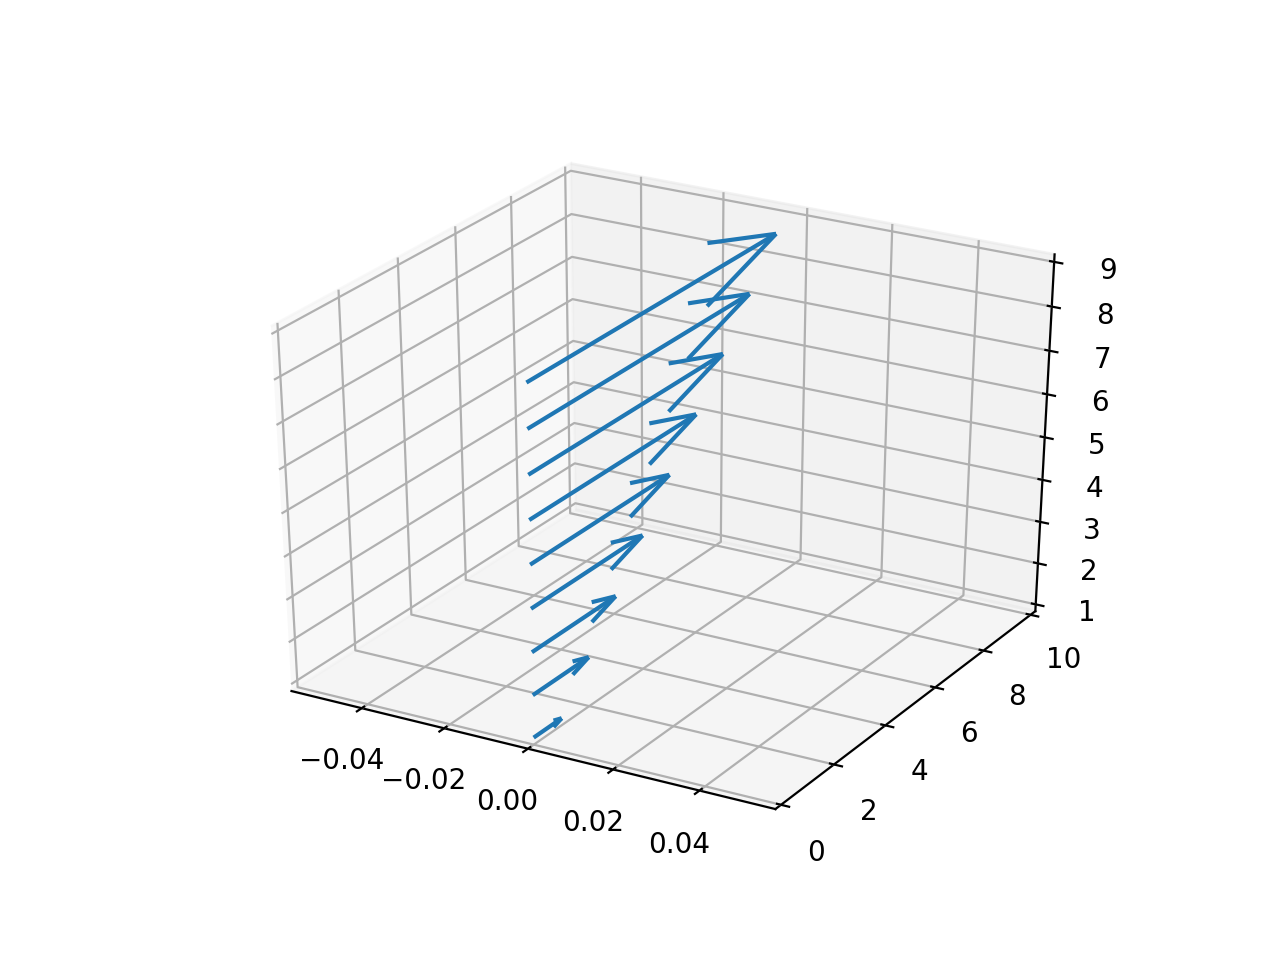

In [3]:
x = np.zeros(10)
y = np.zeros(10)
z = np.arange(10) # remove *100 and the arrow heads will reappear.
dx = np.zeros(10)
dy = np.arange(10)
dz = np.zeros(10)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.quiver(x, y, z, dx, dy, dz)
ax.set_ylim(0,10)

plt.show()

(20, 248, 265)
(20, 248, 265)
(20, 248, 265)


<IPython.core.display.Javascript object>


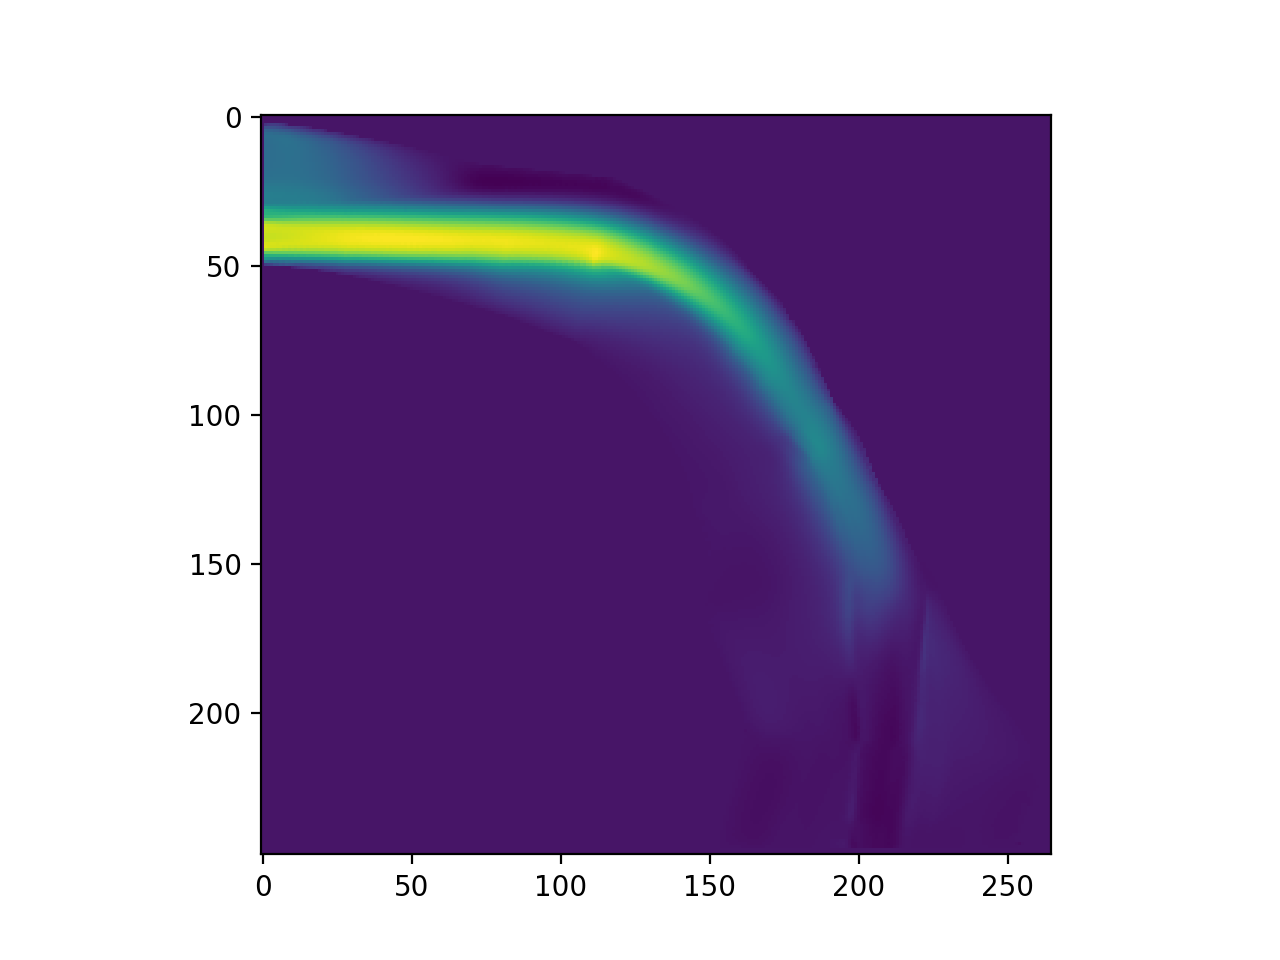

<IPython.core.display.Javascript object>


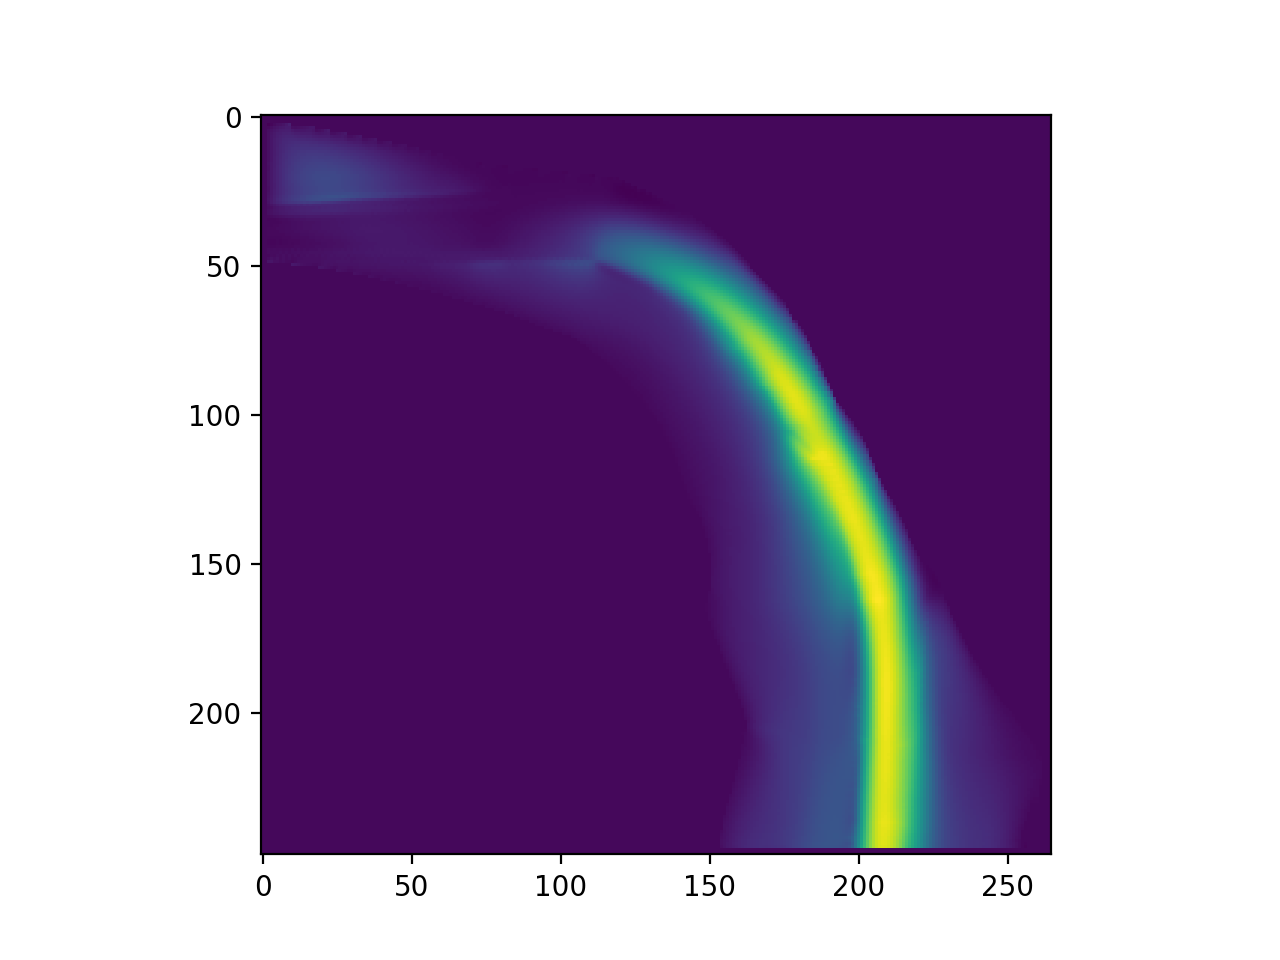

In [4]:
import skimage.io

z_dat = skimage.io.imread('data/GPU_result/gpu_Z.tif')
u_dat = skimage.io.imread('data/GPU_result/gpu_U.tif')
v_dat = skimage.io.imread('data/GPU_result/gpu_V.tif')

z_dat = np.transpose(z_dat, (0, 2, 1))
u_dat = np.transpose(u_dat, (0, 2, 1))
v_dat = np.transpose(v_dat, (0, 2, 1))
print(z_dat.shape)
print(u_dat.shape)
print(v_dat.shape)

fig = plt.figure()
plt.imshow(u_dat[10,...])
plt.show()

fig = plt.figure()
plt.imshow(v_dat[10,...])
plt.show()

In [8]:
!rm GPU_*.png

<IPython.core.display.Javascript object>


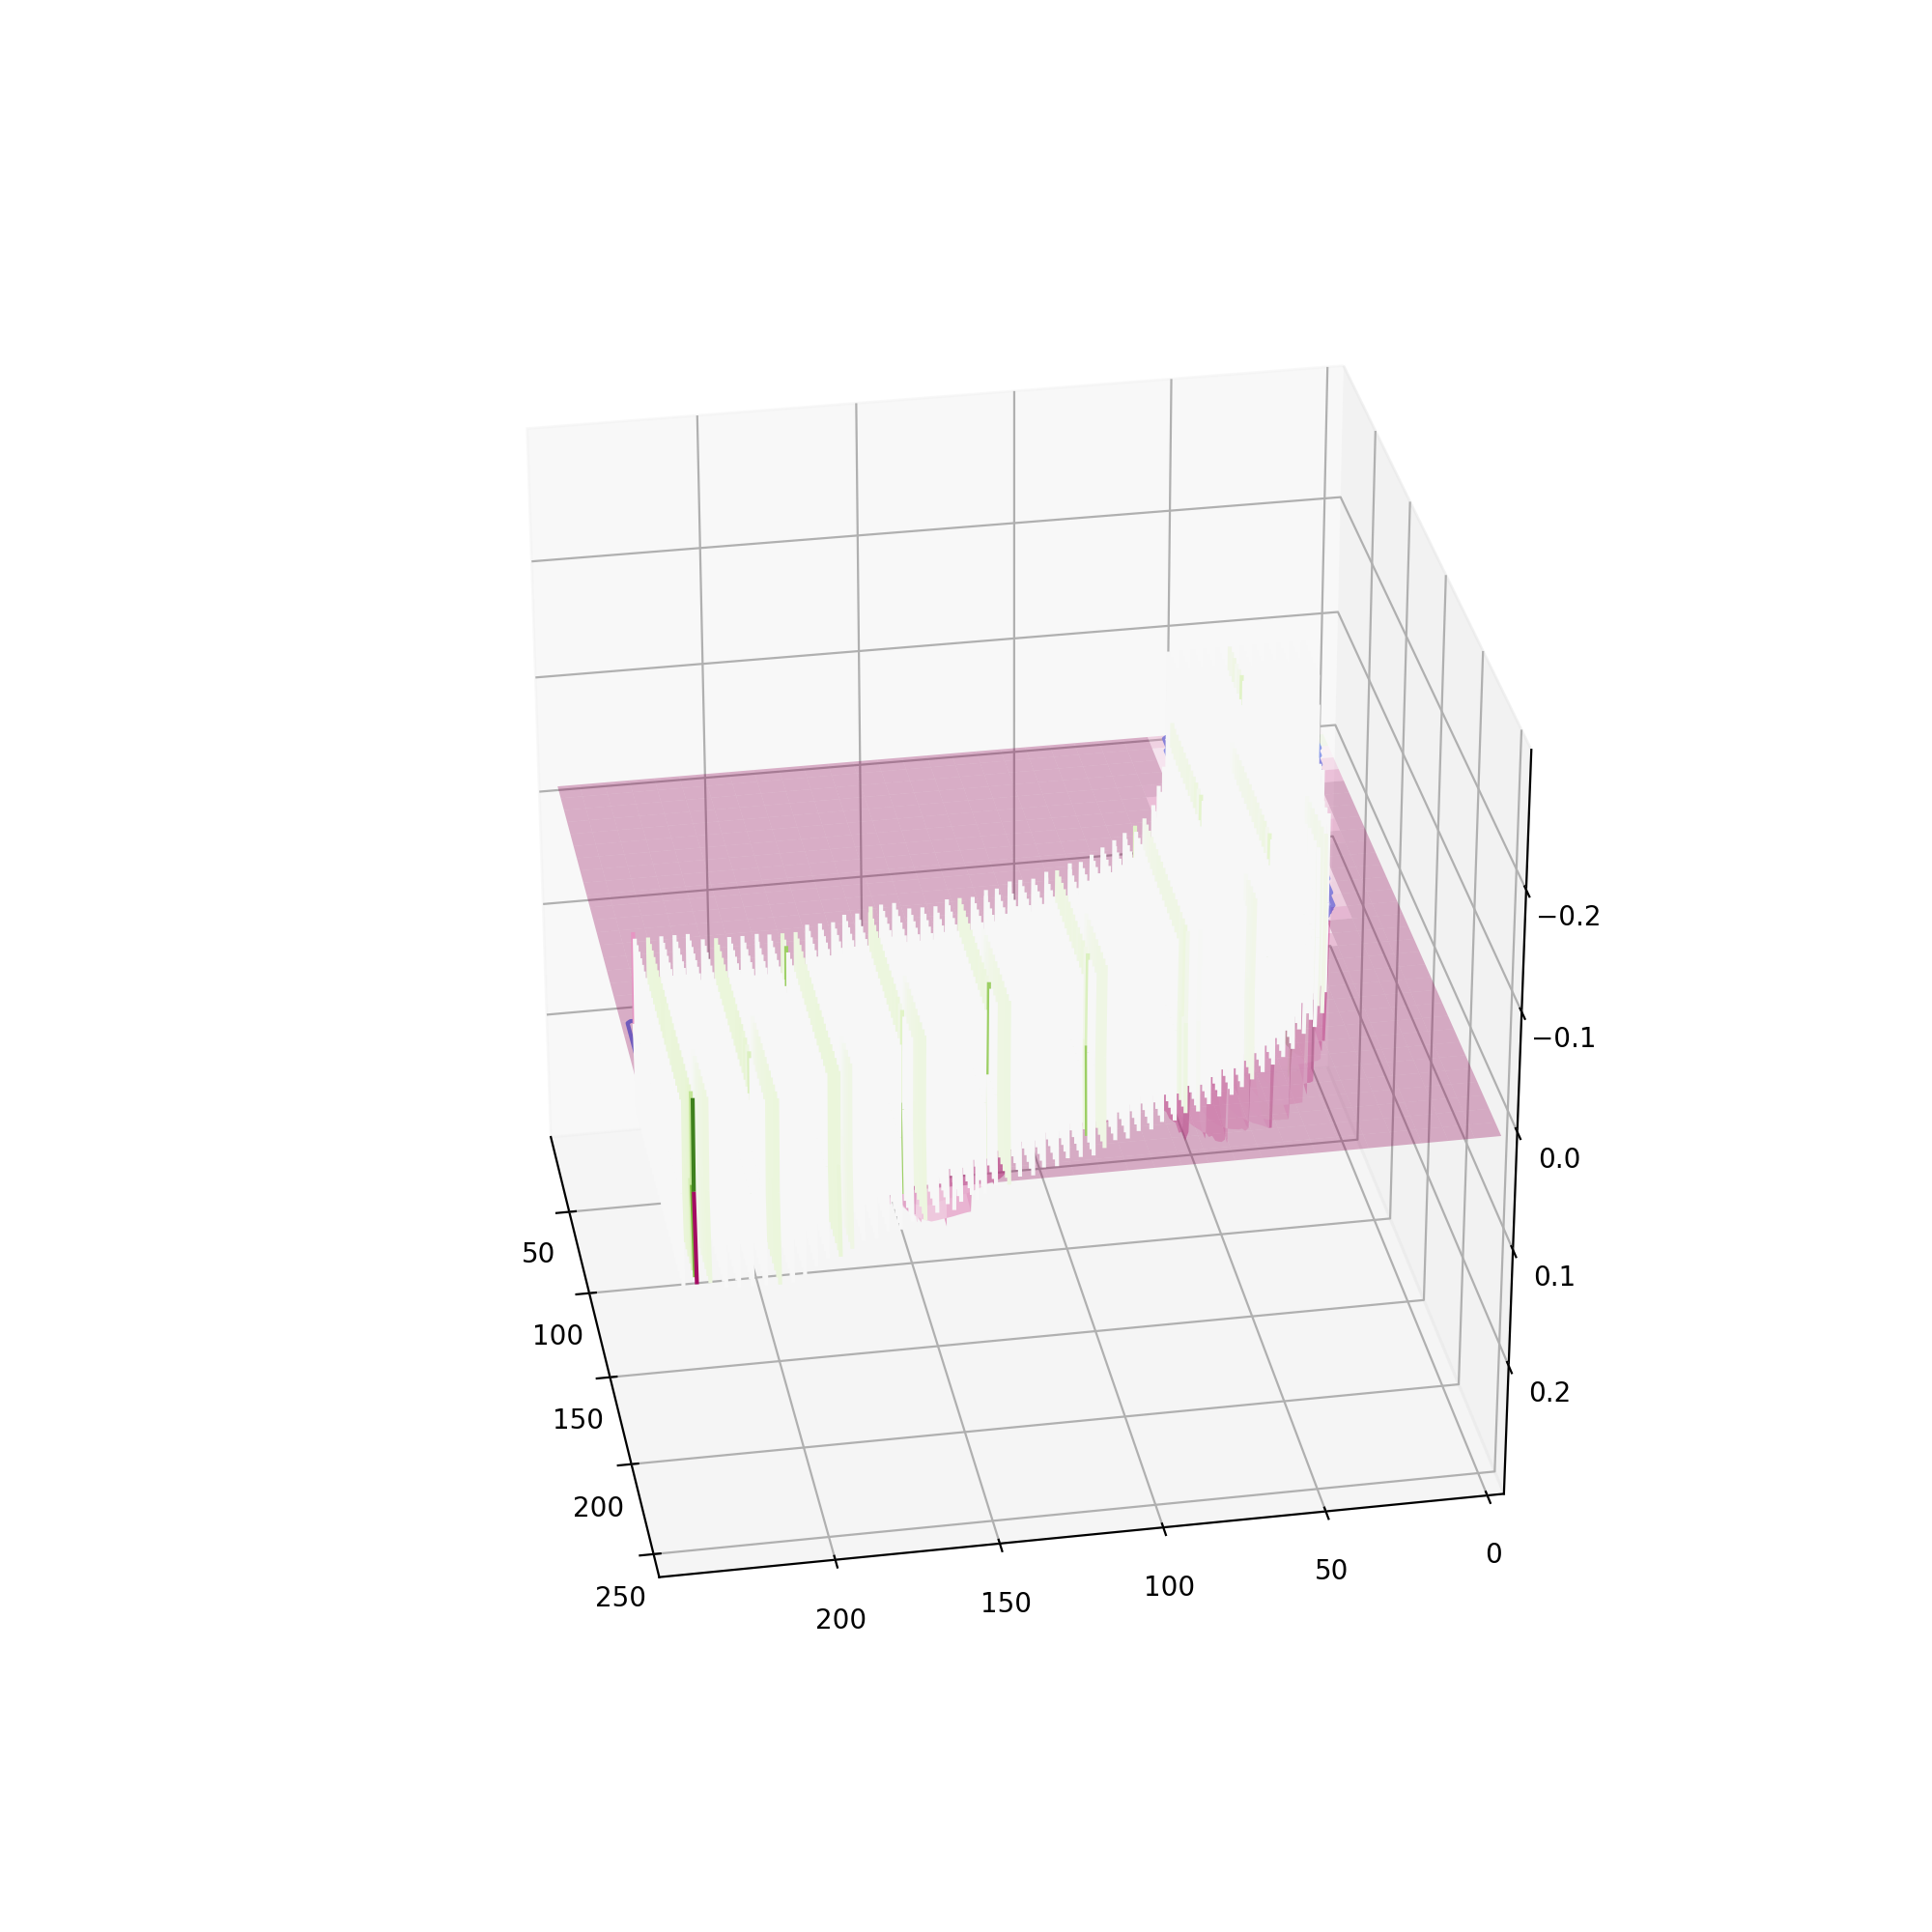

**************************************************
0.2049443699373464 0.028882860437934865
(248, 265, 1) (248, 265, 1) (248, 265, 1)
**************************************************
0.9416472554196655 0.638517210239908
(248, 265, 1) (248, 265, 1) (248, 265, 1)
**************************************************
0.9417055130579974 0.6385812468142122
(248, 265, 1) (248, 265, 1) (248, 265, 1)
**************************************************
1.450701817177216 1.0581301885759542
(248, 265, 1) (248, 265, 1) (248, 265, 1)
**************************************************
1.450771476783843 1.0581890080040546
(248, 265, 1) (248, 265, 1) (248, 265, 1)
**************************************************
1.9541099377019682 1.4885219797500517
(248, 265, 1) (248, 265, 1) (248, 265, 1)
**************************************************
1.9541797451004983 1.4885833384370233
(248, 265, 1) (248, 265, 1) (248, 265, 1)
**************************************************
2.2096174315289208 1.747863817925

In [6]:

# print(vth_files[:10])
# print(z_files[:10])
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

idx = 0
for k in range(z_dat.shape[0]):
    idx = idx+1
    print('*'*50)
    
    # Read data from vth_file
    #vth_dat = parse_vth(vth_file=vth_file)
    
    # Read data from z_file
    #z_dat = parse_z(z_file=z_file)
    dimy, dimx = z_dat[k,...].shape
    
    # Take the magnitude
#     mag = np.zeros((dimy, dimx), dtype=np.float32)
#     mag[vth_dat[...,2].astype(np.int32)-1, 
#         vth_dat[...,1].astype(np.int32)-1] = vth_dat[...,3] # Magnitude
    
#     # Take the angle
#     deg = np.zeros((dimy, dimx), dtype=np.float32)
#     deg[vth_dat[...,2].astype(np.int32)-1, 
#         vth_dat[...,1].astype(np.int32)-1] = vth_dat[...,4] # Phase
    
#     # Convert angle to degree
#     rad = np.deg2rad(deg)
#     cplx = mag * np.exp(1j*rad)
    
#     rx = np.real(cplx) 
#     ry = np.imag(cplx) 
    rx = np.squeeze(u_dat[k,...])
    ry = np.squeeze(v_dat[k,...])
    deg = np.angle(rx + 1j*ry, deg=1)
    rad = np.deg2rad(deg)
    
    print(rx.max(), ry.max())
    norm = Normalize()
    norm.autoscale(rad.flatten())
    cmap = plt.cm.PiYG #PiYG #BuGn

    ##################################################################################
  

    yy, xx, zz = np.mgrid[0:dimy,0:dimx, 0:0.4:0.4]
    #print(zz)
    print(xx.shape, yy.shape, zz.shape)
   
    
    u = np.expand_dims(rx, -1)
    v = np.expand_dims(ry, -1)
    rz = np.expand_dims(np.squeeze(z_dat[k,...]), -1)
    w = np.zeros_like(rz)
    #print(rz.max())
    #print(rz.min())
    #print(rz)
    #print(rx.shape, ry.shape, z_dat.shape)
    
    s = 4
    i = idx%3 # For alternating the quiver
    
# Keyword arguments:
    x = xx.reshape(np.product(xx.shape))
    y = yy.reshape(np.product(yy.shape))
    z = zz.reshape(np.product(zz.shape))
    # length: [1.0 | float]
    # The length of each quiver, default to 1.0, the unit is the same with the axes
    # arrow_length_ratio: [0.3 | float]
    # The ratio of the arrow head with respect to the quiver, default to 0.3
    # pivot: [ 'tail' | 'middle' | 'tip' ]
    # The part of the arrow that is at the grid point; the arrow rotates about this point, hence the name pivot. 
    # Default is 'tail'
    # normalize: bool
    # When True, all of the arrows will be the same length. 
    # This defaults to False, where the arrows will be different lengths depending on the values of u,v,w.
    # Any additional keyword arguments are delegated to LineCollection
    plt.cla()
    
    ax.quiver3D(xx[i::s,i::s,:], yy[i::s,i::s,:], w[i::s,i::s,:], 
              #rx[i::s,i::s,:], ry[i::s,i::s,:], 0.01*z_dat[i::s,i::s,:], 
                u[i::s,i::s,:],
                v[i::s,i::s,:],
                w[i::s,i::s,:],
                length=1,
                arrow_length_ratio=0.3,
                pivot='tail',
                normalize=True,
                color=cmap(norm(rad.flatten())),
              #pivot='tail', 
              #color=cmap(norm(rad.flatten())),
              #length=0.1,
              #lw=2,
              #normalize=False,
              #arrow_length_ratio=0.1,
              )
  
    # Set the axis off
    ax.axis('equal')
    #ax.axis('off')
    #ax.set_xsticklabels()
    #ax.set_ysticklabels()
    #ax.set_zsticklabels()

    ax.set_xlim3d(0, dimx)
    ax.set_ylim3d(0, dimy)
    ax.set_zlim3d(-0.3, 0.3)

    
    ax.view_init(-150, -170)
    ##################################################################################
    # Plot surface
    ax.plot_surface(np.squeeze(xx), 
                    np.squeeze(yy), 
                    np.squeeze(rz), 
                    cmap=cm.PiYG,
                    rstride=8, cstride=8, alpha=0.3)
    
    cset = ax.contour(np.squeeze(xx), 
                      np.squeeze(yy), 
                      np.squeeze(rz), zdir='z', offset=0.0, cmap=cm.coolwarm)
#     cset = ax.contour(np.squeeze(xx), 
#                       np.squeeze(yy), 
#                       np.squeeze(rz), zdir='z', offset=0.0, cmap=cm.coolwarm, 
#                       extend3d=True, 
#                       stride=0.01)

    
    plt.show()
    #head, tail = os.path.split(vth_file)
    plt.savefig('GPU_'+str(k).zfill(4)+'.png', bbox_inches='tight')
    plt.gca().axes.get_xaxis().set_visible(False)
# 

In [7]:
rad.shape


(248, 265)